In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Employee_Database-2.xlsx")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 31 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               4410 non-null   int64  
 1   Attrition                         4410 non-null   object 
 2   BusinessTravel                    4410 non-null   object 
 3   Department                        4410 non-null   object 
 4   DistanceFromHome                  4410 non-null   int64  
 5   Education                         4410 non-null   int64  
 6   EducationField                    4410 non-null   object 
 7   EmployeeID                        4410 non-null   int64  
 8   Gender                            4410 non-null   object 
 9   JobLevel                          4410 non-null   int64  
 10  JobRole                           4410 non-null   object 
 11  MaritalStatus                     4410 non-null   object 
 12  Monthl

## Preprocessing


In [ ]:
df

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Job Involvemnt,Performance Rating,Environment Satisfaction,JobSatisfaction,WorkLifeBalance,Avg_hrs_worked,manager evalualtion percentage,Employee satisfaction percentage,OverTime
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,Healthcare Representative,Married,131160,1.0,11,8,0,1.0,6,1,0,0,3.0,3.0,3,4,2,7.376473,0.750,0.750000,No
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,2,Female,1,Research Scientist,Single,41890,0.0,23,8,1,6.0,3,5,1,4,2.0,4.0,3,2,4,7.719344,0.750,0.750000,No
2,32,No,Travel_Frequently,Research & Development,17,4,Other,3,Male,4,Sales Executive,Married,193280,1.0,15,8,3,5.0,2,5,0,3,3.0,3.0,2,2,1,7.012751,0.750,0.416667,No
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,4,Male,3,Human Resources,Married,83210,3.0,11,8,3,13.0,5,8,7,5,2.0,3.0,4,4,3,7.194779,0.625,0.916667,No
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,5,Male,1,Sales Executive,Single,23420,4.0,12,8,2,9.0,2,6,0,4,3.0,3.0,4,1,3,8.006359,0.750,0.666667,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,4406,Female,1,Research Scientist,Single,60290,3.0,17,8,1,10.0,5,3,0,2,3.0,3.0,4,1,3,8.522892,0.750,0.666667,Yes
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,4407,Male,1,Laboratory Technician,Divorced,26790,2.0,15,8,0,10.0,2,3,0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,4408,Male,2,Sales Executive,Married,37020,0.0,20,8,0,5.0,4,4,1,2,3.0,4.0,1,3,3,7.708768,0.875,0.583333,No
4408,42,No,Travel_Rarely,Sales,18,2,Medical,4409,Male,1,Laboratory Technician,Divorced,23980,0.0,14,8,1,10.0,2,9,7,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#check for NaN values
df.isnull().sum()

Age                                   0
Attrition                             0
BusinessTravel                        0
Department                            0
DistanceFromHome                      0
Education                             0
EducationField                        0
EmployeeID                            0
Gender                                0
JobLevel                              0
JobRole                               0
MaritalStatus                         0
MonthlyIncome                         0
NumCompaniesWorked                   19
PercentSalaryHike                     0
StandardHours                         0
StockOptionLevel                      0
TotalWorkingYears                     9
TrainingTimesLastYear                 0
YearsAtCompany                        0
YearsSinceLastPromotion               0
YearsWithCurrManager                  0
Job Involvemnt                      777
Performance Rating                  777
Environment Satisfaction            777


In [ ]:
# Impute missing values in numeric columns with the median
numeric_columns = ["NumCompaniesWorked", "TotalWorkingYears"]  # List all numeric columns
for col in numeric_columns:
    median = df[col].median()
    df[col].fillna(median, inplace=True)


In [ ]:
# Impute missing values in categorical columns with the mode
categorical_columns = ["Job Involvemnt", "Performance Rating", "Environment Satisfaction","JobSatisfaction","WorkLifeBalance"]  # List all categorical columns
for col in categorical_columns:
    mode = df[col].mode()[0]  # Mode may return multiple values, so select the first one
    df[col].fillna(mode, inplace=True)


In [ ]:
# Remove rows with missing values in specific columns
columns_to_check = ["Employee satisfaction percentage", "OverTime", "manager evalualtion percentage"]  # List columns to check
df.dropna(subset=columns_to_check, inplace=True)


In [ ]:
#check for NaN values
df.isnull().sum()

Age                                 0
Attrition                           0
BusinessTravel                      0
Department                          0
DistanceFromHome                    0
Education                           0
EducationField                      0
EmployeeID                          0
Gender                              0
JobLevel                            0
JobRole                             0
MaritalStatus                       0
MonthlyIncome                       0
NumCompaniesWorked                  0
PercentSalaryHike                   0
StandardHours                       0
StockOptionLevel                    0
TotalWorkingYears                   0
TrainingTimesLastYear               0
YearsAtCompany                      0
YearsSinceLastPromotion             0
YearsWithCurrManager                0
Job Involvemnt                      0
Performance Rating                  0
Environment Satisfaction            0
JobSatisfaction                     0
WorkLifeBala

In [ ]:
print('Number of duplicated values:',df.duplicated().sum())

Number of duplicated values: 0


In [ ]:
 df['Attrition'] = df['Attrition'].replace({'No': 0, 'Yes': 1})

<ipython-input-16-3f8cb9539401>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


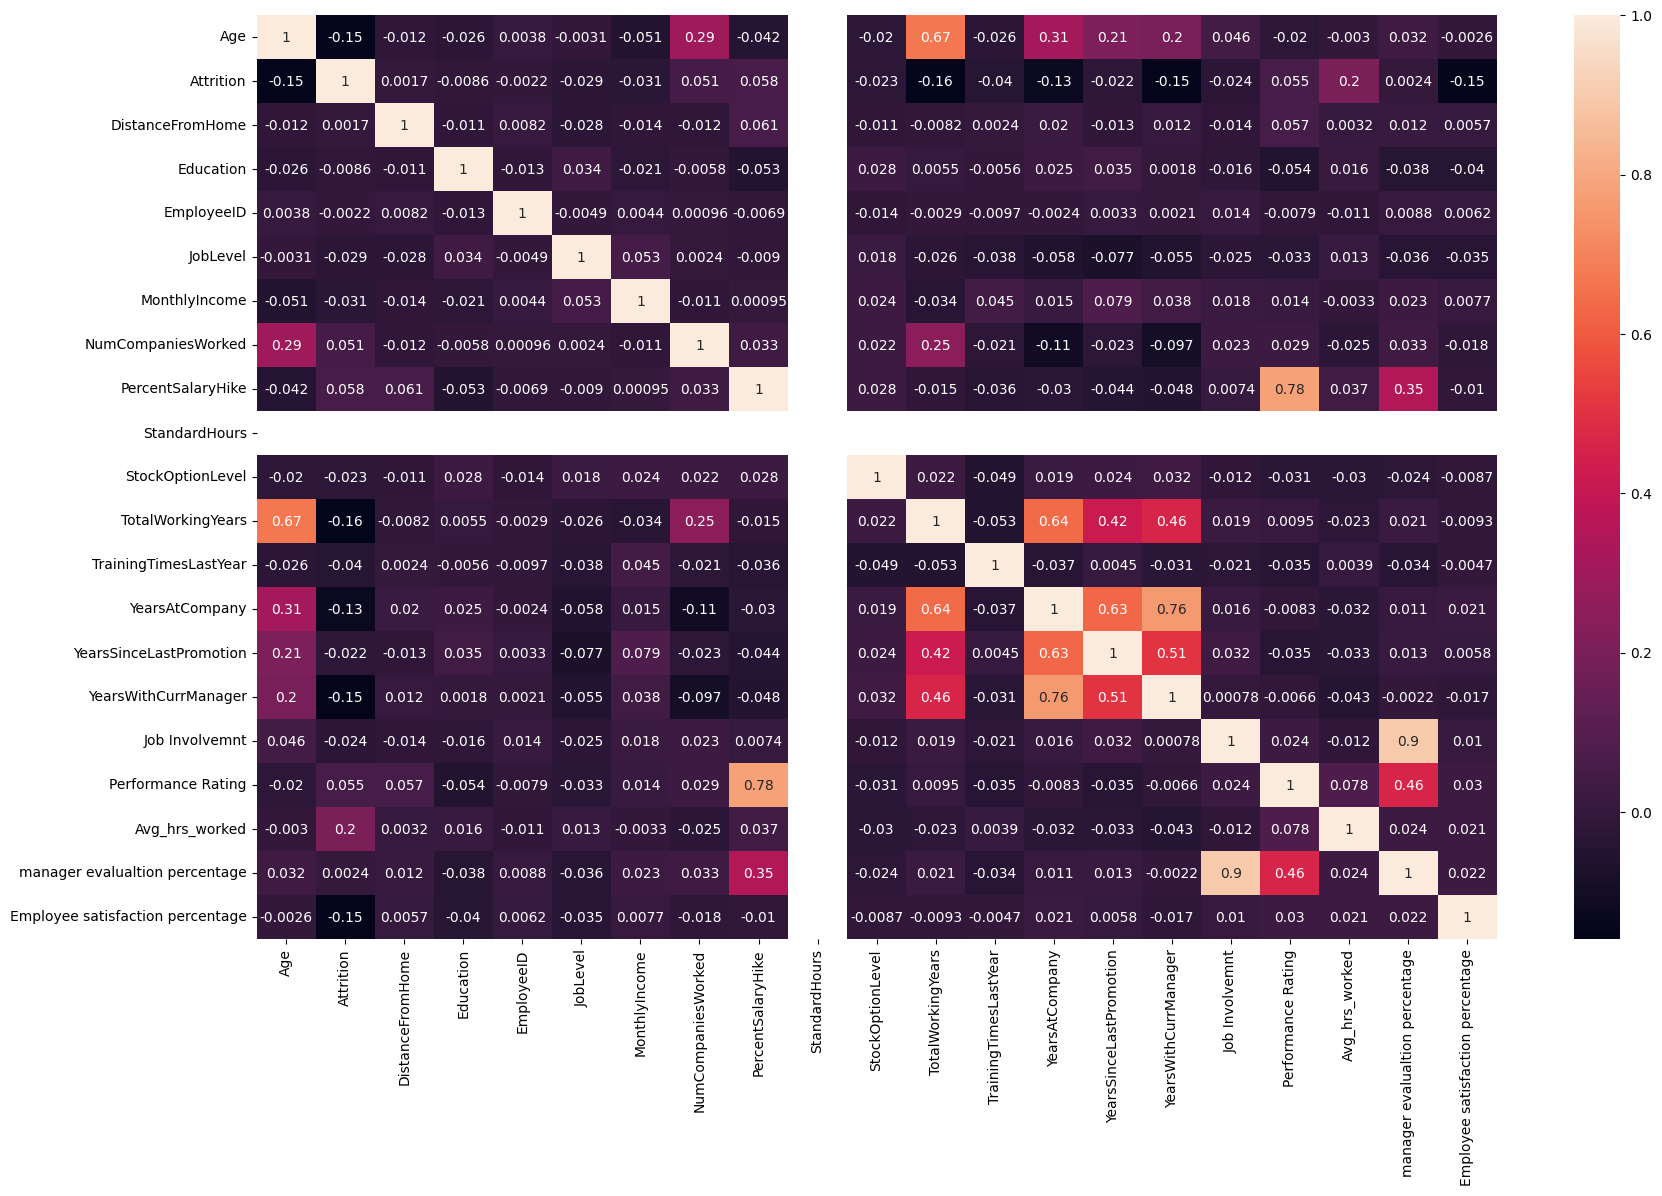

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (20,12))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [ ]:
def onehot_encode(df, column):
    df = df.copy()
    dummies = pd.get_dummies(df[column], prefix=column)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def preprocess_inputs(df):
    df = df.copy()

    # Drop single-value columns and id columns
    df = df.drop(['StandardHours','EmployeeID'], axis=1)

    # Binary-encode binary columns
    df['Gender'] = df['Gender'].replace({'Female': 0, 'Male': 1})
    df['OverTime'] = df['OverTime'].replace({'No': 0, 'Yes': 1})
    df['Attrition'] = df['Attrition'].replace({'No': 0, 'Yes': 1})

    # Ordinal-encode the BusinessTravel column
    df['BusinessTravel'] = df['BusinessTravel'].replace({'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2})

    # One-hot encoding (make sure the onehot_encode function is defined)
    for column in ['Department', 'EducationField', 'JobRole', 'MaritalStatus']:
        df = onehot_encode(df, column=column)  # Implement onehot_encode function

    # Split df into X and y
    y = df['Attrition']
    X = df.drop('Attrition', axis=1)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

    # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

    return X_train, X_test, y_train, y_test


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Your data preparation and loading code here

# Now you can create your plot
with sns.axes_style(style='ticks'):
    g = sns.catplot(x="MaritalStatus", y="YearsInCurrentRole", hue="Attrition", data=df, kind="box")

# Show the plot if needed
plt.show()


ValueError: ignored

In [ ]:
df[(df["Attrition"] == 1)].groupby(["BusinessTravel"]).size() / df.groupby(["BusinessTravel"]).size()

In [ ]:
df[(df["Attrition"] == 1)].groupby(["OverTime"]).size() / df.groupby(["OverTime"]).size()

In [ ]:
import pandas as pd
import numpy as np

# Assuming 'data' is your DataFrame
data = df.replace(' ', np.nan)  # Replace empty strings with NaN

# Drop rows with NaN values
data = df.dropna()

# Now, you can proceed with data preprocessing
X_train, X_test, y_train, y_test = preprocess_inputs(data)


In [ ]:
X_train

In [ ]:
y_train

In [ ]:
models = {
    "                   Logistic Regression": LogisticRegression(),
    "                   K-Nearest Neighbors": KNeighborsClassifier(),
    "                         Decision Tree": DecisionTreeClassifier(),
    "                         Random Forest": RandomForestClassifier(),
    "                     Gradient Boosting": GradientBoostingClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

In [ ]:
for name, model in models.items():
    print(name + ": {:.2f}%".format(model.score(X_test, y_test) * 100))


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
# Create a Logistic Regression model
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))








In [ ]:
import matplotlib.pyplot as plt

# Get the coefficients of the logistic regression model
coefficients = model.coef_[0]

# Get the names of the predictor variables
predictor_names = X_train.columns  # Use the training set columns for predictor names

# Create a DataFrame to organize the coefficients and their corresponding variable names
coefficients_df = pd.DataFrame({'Variable': predictor_names, 'Coefficient': coefficients})

# Sort the DataFrame by absolute coefficient values for importance ranking
coefficients_df['Abs_Coefficient'] = abs(coefficients_df['Coefficient'])
coefficients_df = coefficients_df.sort_values(by='Abs_Coefficient', ascending=False)

# Create a bar chart to visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(coefficients_df['Variable'], coefficients_df['Abs_Coefficient'])
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Variable')
plt.title('Feature Importance in Logistic Regression')
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create and train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)


In [ ]:
importances = rf_classifier.feature_importances_


In [ ]:
feature_names = X_train.columns


In [ ]:
import matplotlib.pyplot as plt

# Sort the features by importance
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.xlim(-1, X_train.shape[1])
plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)



In [ ]:
# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", linewidths=0.5, linecolor="black", square=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Create a pair plot with hue='Attrition'
sns.pairplot(df, diag_kind='kde', markers='o', hue='Attrition')

# Show the pair plot
plt.show()
